In [1]:
pwd

'/Users/dabneylyles'

In [2]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Loading and Previewing outcomes.csv
data=pd.read_csv('outcomes.csv')
data.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


In [8]:
'''By looking at the first few rows of the data, I can see that there is a primary key column, projectid.  I can also see that the data in the column of most interest for analysis, is_exciting is stored as a boolean string t/f.  Three columns, great_meassages_proportion, teacher_referred_count, and non_teacher_referred_count store numerical data that could be analyzed through descriptive statisitics.  Blank values are stored as NaN'''

'By looking at the first few rows of the data, I can see that there is a primary key column, projectid.  I can also see that the data in the column of most interest for analysis, is_exciting is stored as a boolean string t/f.  Three columns, great_meassages_proportion, teacher_referred_count, and non_teacher_referred_count store numerical data that could be analyzed through descriptive statisitics.  Blank values are stored as NaN'

In [21]:
#Preparing the data for analysis
data.great_messages_proportion = data.great_messages_proportion.fillna('')
data.teacher_referred_count = data.teacher_referred_count.fillna('')
data.non_teacher_referred_count = data.non_teacher_referred_count.fillna('')

data.is_exciting[data.is_exciting == 'f'] = 0
data.is_exciting[data.is_exciting == 't'] = 1

data.dtypes

projectid                                         object
is_exciting                                       object
at_least_1_teacher_referred_donor                 object
fully_funded                                      object
at_least_1_green_donation                         object
great_chat                                        object
three_or_more_non_teacher_referred_donors         object
one_non_teacher_referred_donor_giving_100_plus    object
donation_from_thoughtful_donor                    object
great_messages_proportion                         object
teacher_referred_count                            object
non_teacher_referred_count                        object
dtype: object

In [46]:
data['is_exciting'] = data.is_exciting.astype(int)

data['great_messages_proportion'] = pd.to_numeric(data.great_messages_proportion)
data['teacher_referred_count'] = pd.to_numeric(data.teacher_referred_count)
data['non_teacher_referred_count'] = pd.to_numeric(data.non_teacher_referred_count)

In [57]:
#Create a tables of projects that were exciting and were not exiting
exciting = data['is_exciting'] == 1
data_exciting = data[exciting]

not_exciting = data['is_exciting'] == 0
data_not_exciting = data[not_exciting]

In [53]:
#Descriptive statistics on 'exciting' projects
data_exciting[['great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count']].describe()

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,36710.000000,36710.000000,36710.000000
mean,78.050722,3.069681,7.525770
std,12.109529,3.275403,7.741322
min,62.000000,1.000000,0.000000
25%,66.000000,1.000000,3.000000
50%,75.000000,2.000000,6.000000
75%,85.000000,4.000000,9.000000
max,100.000000,125.000000,304.000000


In [54]:
data_exciting[['great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count']].skew()

great_messages_proportion     0.606520
teacher_referred_count        7.525821
non_teacher_referred_count    6.450794
dtype: float64

In [55]:
data_exciting[['teacher_referred_count', 'non_teacher_referred_count']].median()

teacher_referred_count        2.0
non_teacher_referred_count    6.0
dtype: float64

In [58]:
#Descriptive statistics on 'not exciting' projects
data_not_exciting[['great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count']].describe()

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,402777.000000,488218.000000,488218.000000
mean,50.637266,0.604974,4.123347
std,36.271364,2.026185,5.406978
min,0.000000,0.000000,0.000000
25%,20.000000,0.000000,1.000000
50%,50.000000,0.000000,2.000000
75%,83.000000,0.000000,5.000000
max,100.000000,151.000000,256.000000


In [59]:
data_not_exciting[['great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count']].skew()

great_messages_proportion    -0.033158
teacher_referred_count        9.451734
non_teacher_referred_count    5.571334
dtype: float64

In [60]:
data_not_exciting[['teacher_referred_count', 'non_teacher_referred_count']].median()

teacher_referred_count        0.0
non_teacher_referred_count    2.0
dtype: float64

In [62]:
#Percentage of exiting projects in the dataset
total_exciting = data['is_exciting'].sum()
row_count=data.shape[0]
print(total_exciting/row_count)

0.05927411411760527


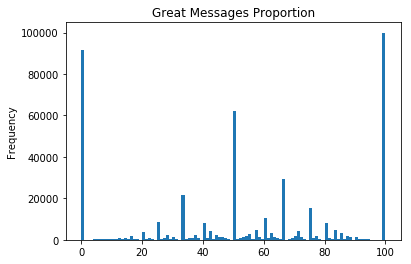

In [65]:
#Descriptive graphs
data['great_messages_proportion'].plot(kind='hist', bins=100)
plt.title('Great Messages Proportion')
plt.show()

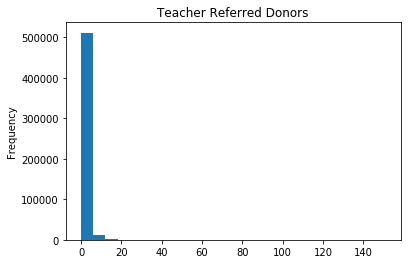

In [67]:
data['teacher_referred_count'].plot(kind='hist', bins=25)
plt.title('Teacher Referred Donors')
plt.show()

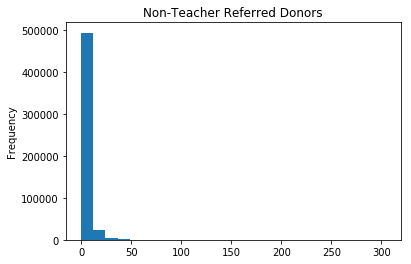

In [68]:
data['non_teacher_referred_count'].plot(kind='hist', bins=25)
plt.title('Non-Teacher Referred Donors')
plt.show()

In [69]:
'''Data Story: Part 1 - Considering the projects that were categorized as exciting, these projects had an average of 0.6 great (or unique) messages.  This is compared to an average of -0.03 unique messages for projects that were not exciting.  There was significant skew in the averages of teacher referred and non-teacher referred donors among both the exciting and unexciting projects.  As a result, the median referrals may be better for comparision between the exciting and unexciting projects.  The median number of teacher referred donors for exciting projects was two, this is compaed to a median of zero teacher referred donors for unexciting projects.  The median number of non teacher referred donors was six for exciting projects and only two for non-teacher referred projects.  Histograms of these three variables reveal that none of these distributions are normal.  Considering that only 5.9% of the projects were exiting, it remains to be determined whether these differences were significant given the disparate sample sizes.'''

'Data Story: Part 1 - Considering the projects that were categorized as exciting, these projects had an average of 0.6 great (or unique) messages.  This is compared to an average of -0.03 unique messages for projects that were not exciting.  There was significant skew in the averages of teacher referred and non-teacher referred donors among both the exciting and unexciting projects.  As a result, the median referrals may be better for comparision between the exciting and unexciting projects.  The median number of teacher referred donors for exciting projects was two, this is compaed to a median of zero teacher referred donors for unexciting projects.  The median number of non teacher referred donors was six for exciting projects and only two for non-teacher referred projects.  Histograms of these three variables reveal that none of these distributions are normal.  Considering that only 5.9% of the projects were exiting, it remains to be determined whether these differences were signifi

In [72]:
#Inferential statistics
correlations = data.corr(method='pearson')
print(correlations)

                            is_exciting  great_messages_proportion  \
is_exciting                    1.000000                   0.212375   
great_messages_proportion      0.212375                   1.000000   
teacher_referred_count         0.282139                   0.006403   
non_teacher_referred_count     0.153074                   0.064787   

                            teacher_referred_count  non_teacher_referred_count  
is_exciting                               0.282139                    0.153074  
great_messages_proportion                 0.006403                    0.064787  
teacher_referred_count                    1.000000                    0.130320  
non_teacher_referred_count                0.130320                    1.000000  


In [73]:
'''Data Story Part 2 - Calculations of the correlation coefficient reveal that neither great (unique) messages, teacher referred donors, nor non-teacher referred donors are correlated with a project being categorized as exciting.'''

'Data Story Part 2 - Calculations of the correlation coefficient reveal that neither great (unique) messages, teacher referred donors, nor non-teacher referred donors are correlated with a project being categorized as exciting.'

In [74]:
#Loading and previewing the table projects.csv
data_projects = pd.read_csv('projects.csv')
data_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [75]:
data_projects.dtypes

projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_ncesid                             float64
school_latitude                           float64
school_longitude                          float64
school_city                                object
school_state                               object
school_zip                                float64
school_metro                               object
school_district                            object
school_county                              object
school_charter                             object
school_magnet                              object
school_year_round                          object
school_nlns                                object
school_kipp                                object
school_charter_ready_promise               object
teacher_prefix                             object
teacher_teach_for_america                  object


In [76]:
#Joining data from outcomes.csv with data from projects.csv on the primary key projectid and previewing the joined table
data_combined = data.merge(data_projects, on='projectid')
data_combined.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,ffffc4f85b60efc5b52347df489d0238,0,NaN,f,NaN,f,NaN,NaN,NaN,NaN,...,Technology,high poverty,Grades 3-5,9.0,703.34,857.73,90.0,f,f,2009-10-11
1,ffffac55ee02a49d1abc87ba6fc61135,0,f,t,t,f,t,f,f,57.0,...,Technology,highest poverty,Grades PreK-2,35.0,207.43,244.04,8.0,f,f,2011-06-11
2,ffff97ed93720407d70a2787475932b0,0,f,t,t,t,t,t,f,100.0,...,Supplies,highest poverty,Grades PreK-2,35.0,440.01,517.66,25.0,t,f,2010-09-11
3,ffff418bb42fad24347527ad96100f81,0,f,f,t,t,f,f,f,100.0,...,Supplies,low poverty,Grades 3-5,17.0,798.85,974.21,20.0,f,f,2009-04-03
4,ffff2d9c769c8fb5335e949c615425eb,1,t,t,t,t,f,t,f,63.0,...,Technology,high poverty,Grades 3-5,30.0,579.74,682.05,25.0,f,f,2013-03-03


In [78]:
combined_row_count=data_combined.shape[0]
print(combined_row_count)

619326


In [79]:
#Inferential Statistics Continued
data_combined['is_exciting'].corr(data_combined['students_reached'])

-0.0009642671758859156

In [80]:
data_combined['is_exciting'].corr(data_combined['total_price_including_optional_support'])

-0.0008840894140135086

In [82]:
'''Project Story Part 3 - After joining the outcomes and the project tables and calculating the correlation coefficents for students reached and total price including optional support (with the is_exciting variable) it is clear that neither the number of students a project impacted nor the total price of the project was correlated with the project being categorized as an exciting one.'''

'Project Story Part 3 - After joining the outcomes and the project tables and calculating the correlation coefficents for students reached and total price including optional support (with the is_exciting variable) it is clear that neither the number of students a project impacted nor the total price of the project was correlated with the project being categorized as an exciting one.'

In [83]:
'''Questions for the Project Partner:
(1) Is there any desire on your part to target and analyze projects effecting kids at the highest poverty level?  Specifically, is there an effort to make these projects more exciting to donors?
(2) Is other data, perhaps data on the completeness of the funding application or whether the appeal included a picture of the classroom, available?  Additional data might allow us to find correlations and build a predictive model for exciting projects.
(3) What is the exciting project categorization used for?  Could a different definiton of is_exciting yeild more useful results?'''

'Questions for the Project Partner:\n(1) Is there any desire on your part to target and analyze projects effecting kids at the highest poverty level?  Specifically, is there an effort to make these projects more exciting to donors?\n(2) Is other data, perhaps data on the completeness of the funding application or whether the appeal included a picture of the classroom, available?  Additional data might allow us to find correlations and build a predictive model for exciting projects.\n(3) What is the exciting project categorization used for?  Could a different definiton of is_exciting yeild more useful results?'